In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import json

In [2]:
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["font.size"] = 18  # Adjust the font size
colors = ['#a8ddb5', '#7bccc4', '#43a2ca','#0868ac']


def read_text_files(directory,component,number,label):
    text_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r') as file:
                d={
                'In-Flight':0,
                'Throughput':0,
                'Latency(ms)': 0,
                'ScaleFactor': component,
                "# of Components":number,
                "Label":label
                }
                for line in file:
                    if line.startswith("In-Flight Requests"):
                        inFlight = int(line.split(' ')[2].strip())
                        d['In-Flight']=inFlight
                    if line.startswith("Ops/s"):
                        parts = line.split(',')
                        throughput = int(parts[1])
                        d['Throughput']=throughput/30
                    
                    if line.startswith("Average Latency"):
                        latency = int(line.split(' ')[2])
                        d['Latency(ms)']=latency
                
                text_data.append(d)
    return text_data



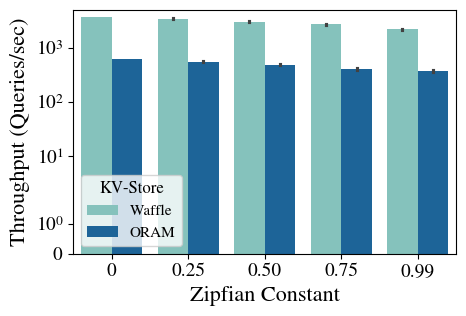

In [10]:
scaleThreeZipf0 = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/Waffle/Zipf0' 
scaleThreeZipf25 = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/Waffle/Zipf25'
scaleThreeZipf50 = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/Waffle/Zipf50'
scaleThreeZipf75 = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/Waffle/Zipf75' 
scaleThreeZipf99 = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/Waffle/Zipf99' 


scaleThreeZipf0ORAM = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/ORAM/Zipf0' 
scaleThreeZipf25ORAM = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/ORAM/Zipf25'
scaleThreeZipf50ORAM = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/ORAM/Zipf50'
scaleThreeZipf75ORAM = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/ORAM/Zipf75' 
scaleThreeZipf99ORAM = '/home/haseeb/Desktop/ReviewGraphs/ZipfSkew/BarPlot/ORAM/Zipf99' 




zipf0 = pd.DataFrame(read_text_files(scaleThreeZipf0,'Waffle',3,'0'))
zipf25 = pd.DataFrame(read_text_files(scaleThreeZipf25,'Waffle',3,'0.25'))
zipf50 = pd.DataFrame(read_text_files(scaleThreeZipf50,'Waffle',3,'0.50'))
zipf75 = pd.DataFrame(read_text_files(scaleThreeZipf75,'Waffle',3,'0.75'))
zipf99 = pd.DataFrame(read_text_files(scaleThreeZipf99,'Waffle',3,'0.99'))

zipf0ORAM = pd.DataFrame(read_text_files(scaleThreeZipf0ORAM,'ORAM',3,'0'))
zipf25ORAM = pd.DataFrame(read_text_files(scaleThreeZipf25ORAM,'ORAM',3,'0.25'))
zipf50ORAM = pd.DataFrame(read_text_files(scaleThreeZipf50ORAM,'ORAM',3,'0.50'))
zipf75ORAM = pd.DataFrame(read_text_files(scaleThreeZipf75ORAM,'ORAM',3,'0.75'))
zipf99ORAM = pd.DataFrame(read_text_files(scaleThreeZipf99ORAM,'ORAM',3,'0.99'))


combined_df = pd.concat([zipf0, zipf25, zipf50, zipf75, zipf99, zipf0ORAM, zipf25ORAM, zipf50ORAM, zipf75ORAM, zipf99ORAM], ignore_index=True)

combined_df.rename(columns={'ScaleFactor': 'KV-Store','Label':"Zipfian"}, inplace=True)


fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust for double-column if needed
ax = sns.barplot(data=combined_df, x='Zipfian', y='Throughput',hue='KV-Store', palette=["#7bccc4","#0868ac"])

ax.set_xlabel("Zipfian Constant", fontsize=16)
ax.set_ylabel("Throughput (Queries/sec)", fontsize=16)
ax.set_yscale("log")
ax.set_yscale("symlog")  # Adjust linthresh to control the transition point
ax.set_ylim(0, 5000)

# ax.set_title("Comparison: ObliDB, ObliSQL(Waffle) and ObliSQL(ORAM)", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=14)
# plt.show()

ax.legend(title='KV-Store', fontsize=11, title_fontsize=12)

fig = ax.get_figure()
fig.tight_layout()

fig.savefig("/home/haseeb/Desktop/ReviewGraphs/Figures/SkewedTpx.png", format='png')

In [7]:
combined_df
average_metrics = combined_df.groupby(['KV-Store', 'Zipfian'])[['Throughput', 'Latency(ms)']].mean()
print(average_metrics)

                   Throughput  Latency(ms)
KV-Store Zipfian                          
ORAM     0         613.322222   954.000000
         0.25      549.800000  1070.333333
         0.50      487.922222  1197.333333
         0.75      400.822222  1451.666667
         0.99      372.155556  1566.333333
Waffle   0        3727.055556   979.000000
         0.25     3427.255556  1066.666667
         0.50     3047.255556  1196.666667
         0.75     2696.888889  1356.000000
         0.99     2188.433333  1648.333333
